In [1]:
import huracanpy

import matplotlib.pyplot as plt

In [2]:
data = huracanpy.load(huracanpy.example_TRACK_file, source = "TRACK")
# In this TRACK file, feature_9 is the wind speed

In [3]:
# 1. Compute Radius of Maximum Wind
RMW = huracanpy.tc.radius_of_maximum_wind(data.lon, data.lat, data.feature_9_lon, data.feature_9_lat)
data = data.assign(RMW = RMW)

Text(0, 0.5, 'Longitude difference')

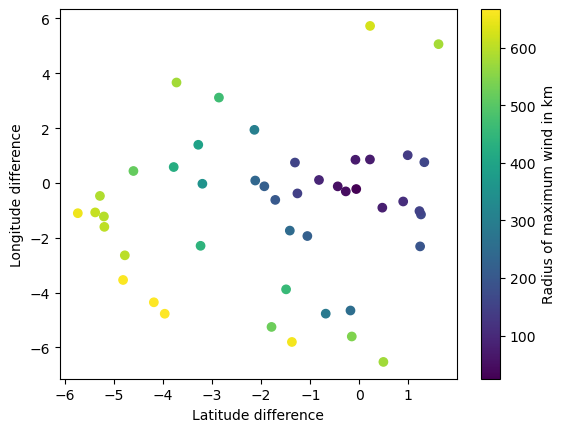

In [10]:
# Verify result
plt.scatter(data.lat-data.feature_9_lat, data.lon - data.feature_9_lon, c = RMW)
plt.colorbar(label = "Radius of maximum wind in km")
plt.xlabel("Latitude difference")
plt.ylabel("Longitude difference")

In [5]:
# 2. Compute beta-drift
V_drift, theta_drift = huracanpy.tc.beta_drift(data.lat, data.feature_9, data.RMW)
data = data.assign(V_drift = V_drift, theta_drift = theta_drift)

Text(0, 0.5, 'radius of maximum wind in km')

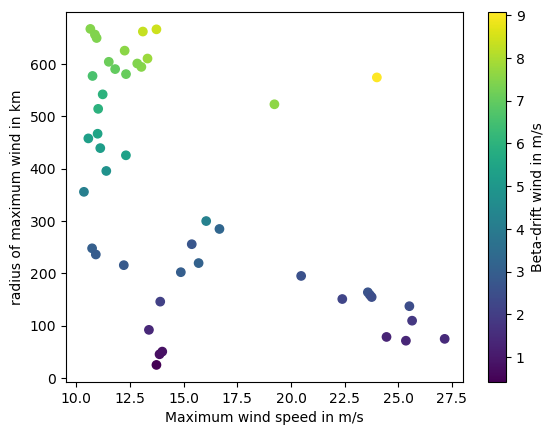

In [6]:
# Verify result
plt.scatter(data.feature_9, data.RMW, c = data.V_drift,)
plt.colorbar(label = "Beta-drift wind in m/s")
plt.xlabel("Maximum wind speed in m/s")
plt.ylabel("radius of maximum wind in km")

In [ ]:
plt.scatter(data.feature_9, data.V_drift, c = data.theta_drift, s = data.RMW)
plt.colorbar(label = "Drift angle in degrees")
plt.xlabel("Maximum wind speed in m/s")
plt.ylabel("Beta drift wind in m/s")
plt.title("Dot size represents the radius of maximum winds")